# Grid Search and Pipelines

In [195]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [196]:
#Load the dataset
df = sns.load_dataset('titanic')

In [197]:
#Drop nulls in embarked
df.dropna(subset=['embarked','embark_town'], inplace=True)

In [198]:
cols = ['pclass', 'sex','parch', 
       'embarked', 'class', 'who', 'adult_male', 'embark_town']

In [199]:
#Fit the 
le = LabelEncoder()
df.loc[:,cols] = df.loc[:,cols].apply(le.fit_transform)

In [201]:
# define x and y 
y = df['survived']
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town']]

We can split the data using stratify to make sure we can get an even split of classes in the train and test set

In [202]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town
0,2,1,22.0,1,0,7.2500,2,2,1,1,2
1,0,0,38.0,1,0,71.2833,0,0,2,0,0
2,2,0,26.0,0,0,7.9250,2,2,2,0,2
3,0,0,35.0,1,0,53.1000,2,0,2,0,2
4,2,1,35.0,0,0,8.0500,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,27.0,0,0,13.0000,2,1,1,1,2
887,0,0,19.0,0,0,30.0000,2,0,2,0,2
888,2,0,NaN,1,2,23.4500,2,2,2,0,2
889,0,1,26.0,0,0,30.0000,0,0,1,1,0


In [203]:
# Split X and y with even class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [204]:
#Impute age using the training mean
mean_age = X_train.age.mean()
X_train['age'].fillna(mean_age, inplace=True)
X_test['age'].fillna(mean_age, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# Random Forest

In [205]:
#Scale the data
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [206]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7808988764044944

In [207]:
#Now with cross validation search
val = cross_val_score(RandomForestClassifier(random_state=42),X_train,y_train,cv=5)
val.mean()

0.8002954791687186

# Random Forest with Grid Search

In [166]:
rf_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
    "max_features": [None,4,5,6,9,10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 3, 5, 6],
    "n_estimators" : [10, 30, 100, 1000]
}

In [213]:
#CV * Number of params to search
5*2*11*6*3*5*3

29700

In [167]:
rf_grid = RandomForestClassifier(random_state=42)
gridsearch = GridSearchCV(rf_grid, rf_param_grid, cv=5, return_train_score=True, n_jobs=-1, verbose=-1)

In [168]:
gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 8696 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 12152 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 14096 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 16184 tasks   

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [None, 4, 5, 6, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 100]},
             return_train_score=True, verbose=-1)

In [209]:
print("Training Accuracy: {:.4}%".format(gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(gridsearch.best_params_))

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(gridsearch.best_estimator_))

Training Accuracy: 84.11%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}
Best Model: RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=10, random_state=42)


In [211]:
gridsearch.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [214]:
gridsearch.best_estimator_.score(X_test, y_test)

0.8089887640449438

# Pipelines

In [215]:
# Split X and y with even class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

#Impute age using the training mean
mean_age = X_train.age.mean()
X_train['age'].fillna(mean_age, inplace=True)
X_test['age'].fillna(mean_age, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [219]:
# Create our pipeline by passing a list of tuples with each class and its name in a string
pipeline1 = Pipeline([
                    ('ss',StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=42))
                    ])

In [220]:
# Fit the training data to pipeline
pipeline1.fit(X_train,y_train)

# Print the accuracy on test set
pipeline1.score(X_test,y_test)

0.7808988764044944

# Pipelines with GridSearch

In [177]:
pipeline2 = Pipeline([
                    ('ss',StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=42))
                    ])

In [178]:
# We set the params, but we add a rf__ to each parameter to let it know its on the rf part of the pipeline
rf_param_grid_pipe = {
    "rf__criterion": ["gini", "entropy"],
    "rf__max_depth": [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
    "rf__max_features": [None,4,5,6,9,10],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf" : [1, 2, 3, 5, 6],
    "rf__n_estimators" : [10, 30, 100]
}

In [179]:
# Instanstiate the gridsearch pipeline
grid_search_pipe = GridSearchCV(pipeline2, rf_param_grid_pipe, cv=5, verbose=1, n_jobs=-1, return_train_score=True)


In [180]:
#Fit the grid search to the data
grid_search_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 5940 candidates, totalling 29700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 19552 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 22452 tasks  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 14,
                                           16],
                         'rf__max_features': [None, 4, 5, 6, 9, 10],
                         'rf__min_samples_leaf': [1, 2, 3, 5, 6],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [10, 30, 100]},
             return_train_score=True, verbose=1)

In [181]:
grid_search_pipe.score(X_test, y_test)

0.8089887640449438

In [182]:

# Single best score achieved across all params (min_samples_split)
print(grid_search_pipe.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_search_pipe.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_search_pipe.best_estimator_)
#Identify the best score during fitting with cross-validation

0.8411110016743819
{'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 5, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 10, 'rf__n_estimators': 10}
Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, max_features=5,
                                        min_samples_leaf=3,
                                        min_samples_split=10, n_estimators=10,
                                        random_state=42))])


In [221]:
#Predictions with grid search
#Predict the response for test dataset
y_pred = grid_search_pipe.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8089887640449438


### Pickling the best Estimator



In [184]:
# pickle list object
model_pickle_path = 'best_model.pkl'

#Create a variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(grid_search_pipe.best_estimator_, model_pickle)
model_pickle.close()

# Randomized Search

Randomized Search allows us to search a distribution for each parameter instead of only a desginated value like GridSearch



In [224]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Load in the Iris Dataset and the LogisticRegression class
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
# Set a distribution and options for the different parameters
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
#Fit and check the best parameters
clf = RandomizedSearchCV(logistic, distributions, random_state=0,n_iter=1000)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [223]:
search.score(iris.data, iris.target)

0.98

### Documentation
- [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) (Documentation)

- [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV) (Documentation)

- [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (Documentation)


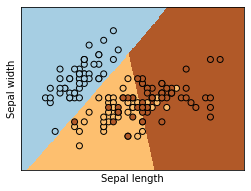

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [226]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])